# Machine Learning Zoomcamp, cohort 2024
# HW4 / Arcangela Arnone Cohen

### Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In this homework, we will use the Bank Marketing dataset. Download it from here.

You can do it with wget:

wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
We need bank-full.csv.

In this dataset the target variable is y variable - has the client subscribed a term deposit or not.

### Dataset preparation
For the rest of the homework, you'll need to use only these columns:

* 'age',
* 'job',
* 'marital',
* 'education',
* 'balance',
* 'housing',
* 'contact',
* 'day',
* 'month',
* 'duration',
* 'campaign',
* 'pdays',
* 'previous',
* 'poutcome',
* 'y'

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [1]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('C:/Users/arcangelaac/Downloads/MACHINELZC/HW/Hw3_data/bank-full.csv',engine='python', sep=';')
data.shape

(45211, 17)

In [68]:
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
data.y = (data.y == 'yes').astype(int)

In [72]:
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# selecting columns

In [76]:
features = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]

In [78]:
data = data[features]

In [ ]:
# prepare the split

In [15]:
from sklearn.model_selection import train_test_split

In [80]:
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [82]:
assert len(data) == (len(data_train) + len(data_val) + len(data_test))

In [84]:
len(data_train), len(data_val), len(data_test)

(27126, 9042, 9043)

In [86]:
y_train = data_train.y.values
y_val = data_val.y.values
y_test = data_test.y.values

In [88]:
data_train = data_train.drop('y', axis=1)
data_val = data_val.drop('y', axis=1)
data_test = data_test.drop('y', axis=1)

assert 'y' not in data_train.columns
assert 'y' not in data_val.columns
assert 'y' not in data_test.columns

## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
* Use the training dataset for that
  
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* balance
* day
* duration
* previous

In [90]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# It's the same data that the previous week.  I'm not going to put in lowercase

In [92]:
numericalq1 = ['balance','day','duration','previous']

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc 
import matplotlib.pyplot as plt

In [ ]:
# roc_auc_score(y_val, y_pred)    y_val is the same, im this case data_train and y_pred should be each numerical value, feature. 
# if feature > t the y=1 and similar with the other case.  t= 0.5

In [96]:
scores = {}
for col in numericalq1:
    # ROC AUC score per 4 numerical feature
    auc = roc_auc_score(y_train, data_train[col])
    
    # Check if AUC is < 0.5 -- revert if < 0.5
    if auc < 0.5:
        auc = roc_auc_score(y_train, -data_train[col])
    
    scores[col] = auc

scores

{'balance': 0.5888313805382317,
 'day': 0.525957882383908,
 'duration': 0.8147002759670778,
 'previous': 0.5985653242764153}

In [ ]:
# My answer is duration

## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.69
* 0.79
* 0.89
* 0.99

In [63]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [ ]:
# Updating "numerical" and "categorical" lists

In [98]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [100]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [110]:
list(data.dtypes[data.dtypes == 'object'].index)

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [112]:
list(data.dtypes[data.dtypes != 'object'].index)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [114]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(data_train[categorical + numerical].to_dict(orient='records'))
X_val = dv.transform(data_val.to_dict(orient='records'))
X_test = dv.transform(data_test.to_dict(orient='records'))

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

auc_score = roc_auc_score(y_val, y_pred)     #roc_auc_score(ytrue, yscore)

print(f' Q2 Answer: {auc_score: .3f}')

 Q2 Answer:  0.900


## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [135]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [181]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [183]:
scores

[(0.0, 1098, 7944, 0, 0),
 (0.01, 1094, 6974, 4, 970),
 (0.02, 1093, 5768, 5, 2176),
 (0.03, 1087, 4727, 11, 3217),
 (0.04, 1065, 3800, 33, 4144),
 (0.05, 1047, 3086, 51, 4858),
 (0.06, 1021, 2519, 77, 5425),
 (0.07, 993, 2155, 105, 5789),
 (0.08, 972, 1864, 126, 6080),
 (0.09, 946, 1640, 152, 6304),
 (0.1, 926, 1494, 172, 6450),
 (0.11, 895, 1359, 203, 6585),
 (0.12, 860, 1215, 238, 6729),
 (0.13, 836, 1117, 262, 6827),
 (0.14, 814, 1039, 284, 6905),
 (0.15, 797, 972, 301, 6972),
 (0.16, 777, 898, 321, 7046),
 (0.17, 760, 841, 338, 7103),
 (0.18, 743, 781, 355, 7163),
 (0.19, 729, 731, 369, 7213),
 (0.2, 711, 691, 387, 7253),
 (0.21, 700, 652, 398, 7292),
 (0.22, 688, 615, 410, 7329),
 (0.23, 667, 574, 431, 7370),
 (0.24, 649, 549, 449, 7395),
 (0.25, 634, 515, 464, 7429),
 (0.26, 622, 495, 476, 7449),
 (0.27, 605, 472, 493, 7472),
 (0.28, 595, 450, 503, 7494),
 (0.29, 578, 435, 520, 7509),
 (0.3, 565, 412, 533, 7532),
 (0.31, 553, 394, 545, 7550),
 (0.32, 546, 378, 552, 7566),
 (0.33

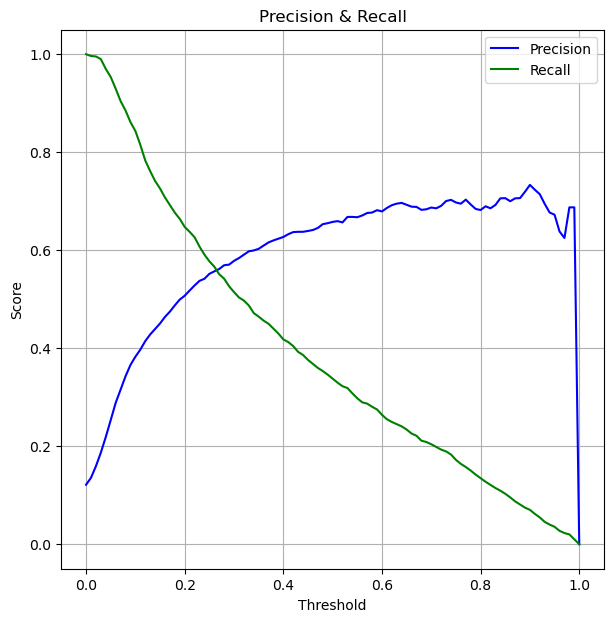

In [188]:
thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []

#    p = tp / (tp + fp)    and     r = tp / (tp + fn)

for t in thresholds:
    y_val_pred = (y_pred >= t).astype(int)
    
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)

    precisions.append(precision)
    recalls.append(recall)
   
# Plotting Precision and Recall
plt.figure(figsize=(7,7))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall')
plt.grid(True)
plt.legend()
plt.show() 

In [ ]:
# my answer is 0.265

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 ⋅ P ⋅ R /  P + R

Where P  is precision and R   is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* 0.02
* 0.22
* 0.42
* 0.62

In [202]:
thresholds = np.arange(0, 1.01, 0.01)

f1s = {}
f1_manuals = {}

for t in thresholds:
    y_val_pred = (y_pred >= t).astype(int)
    
    f1 = f1_score(y_val, y_val_pred)
    f1s[t] = f1
    
    ## Manually
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
 
    f1_m = 2*((precision*recall)/(precision+recall))
    f1_manuals[t] = f1_m
    
max_manual = max(f1_manuals, key=f1_manuals.get)
max_ = max(f1s, key=f1s.get)

print(max_, max_manual)

0.22 0.22


## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

* 0.0001
* 0.006
* 0.06
* 0.26

In [228]:
from sklearn.model_selection import KFold

# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Define the logistic regression model with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Iterate over different folds of data_full_train
for train_index, val_index in kf.split(data_full_train):
    # Split the data into train and validation sets for this fold
    data_train_fold = data_full_train.iloc[train_index]
    data_val_fold = data_full_train.iloc[val_index]

    # Separate the target variable from the features
    y_train_fold = data_train_fold.y.values
    y_val_fold = data_val_fold.y.values

    # Delete the target variable from the feature data
    del data_train_fold['y']
    del data_val_fold['y']

    # Apply one-hot encoding to the categorical features (if not already done)
    X_train_fold = dv.transform(data_train_fold.to_dict(orient='records'))
    X_val_fold = dv.transform(data_val_fold.to_dict(orient='records'))

    # Train the logistic regression model on the train data
    model.fit(X_train_fold, y_train_fold)

    # Predict probability scores on the validation data
    y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

    # Calculate the ROC AUC score for this fold
    auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)

    # Append the AUC score to the list
    auc_scores.append(auc_score_fold)

# Calculate the standard deviation of AUC scores across different folds
std_deviation = np.std(auc_scores)

print(f"Standard Deviation of AUC Scores: {std_deviation}")
print(auc_scores)


Standard Deviation of AUC Scores: 0.0053151357572693
[0.8993883806356288, 0.8989055268937651, 0.9112102229960733, 0.9080952264469403, 0.9100912737695956]


In [230]:

# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Define the logistic regression model with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Iterate over different folds of data_full_train
for train_index, val_index in kf.split(data_full_train):
    # Split the data into train and validation sets for this fold
    data_train_fold = data_full_train.iloc[train_index]
    data_val_fold = data_full_train.iloc[val_index]

    # Separate the target variable from the features
    y_train_fold = data_train_fold.y.values
    y_val_fold = data_val_fold.y.values

    # Delete the target variable from the feature data
    data_train_fold.drop(['y'], axis=1, inplace=True)
    data_val_fold.drop(['y'], axis=1, inplace=True)

    vectorizer = DictVectorizer(sparse=False)
    # Apply one-hot encoding to the categorical features (if not already done)
    X_train_fold = vectorizer.fit_transform(data_train_fold.to_dict(orient='records'))
    X_val_fold = vectorizer.transform(data_val_fold.to_dict(orient='records'))

    # Train the logistic regression model on the train data
    model.fit(X_train_fold, y_train_fold)

    # Predict probability scores on the validation data
    y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

    # Calculate the ROC AUC score for this fold
    auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)

    # Append the AUC score to the list
    auc_scores.append(auc_score_fold)

# Calculate the standard deviation of AUC scores across different folds
std_deviation = np.std(auc_scores)

print(f"Standard Deviation of AUC Scores: {std_deviation:.4f}")

Standard Deviation of AUC Scores: 0.0053


In [ ]:
# my answer is 0.006

## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.000001, 0.001, 1]
* Initialize KFold with the same parameters as previously
* Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.000001
* 0.001
* 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [232]:
# Define the values of C to iterate over
C_values = [0.000001, 0.001, 1]

# Initialize KFold with the same parameters as previously
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize dictionaries to store mean and std scores for each C
mean_scores = {}
std_scores = {}

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []

    # Define the logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    # Iterate over different folds of data_full_train
    for train_index, val_index in kf.split(data_full_train):
        data_train_fold = data_full_train.iloc[train_index]
        data_val_fold = data_full_train.iloc[val_index]

        y_train_fold = data_train_fold.y.values
        y_val_fold = data_val_fold.y.values

        data_train_fold.drop(['y'], axis=1, inplace=True)
        data_val_fold.drop(['y'], axis=1, inplace=True)

        vectorizer = DictVectorizer(sparse=False)
        X_train_fold = vectorizer.fit_transform(data_train_fold.to_dict(orient='records'))
        X_val_fold = vectorizer.transform(data_val_fold.to_dict(orient='records'))

        model.fit(X_train_fold, y_train_fold)

        y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

        auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)
        auc_scores.append(auc_score_fold)

    # Calculate mean and std of AUC scores for the current C
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    # Store the mean and std scores in the dictionaries
    mean_scores[C] = round(mean_auc, 3)
    std_scores[C] = round(std_auc, 3)

# Print the mean and std scores for each C value
for C in C_values:
    print(f"C={C}: Mean AUC = {mean_scores[C]}, Std AUC = {std_scores[C]}")

C=1e-06: Mean AUC = 0.701, Std AUC = 0.009
C=0.001: Mean AUC = 0.861, Std AUC = 0.007
C=1: Mean AUC = 0.906, Std AUC = 0.005


In [ ]:
# My answer is C=1

### END